In [87]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

# 디버깅 모듈 설치
import pdb

In [88]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [89]:
# Hyper Parameter 지정
input_size = 3072 # 입력값이  28 x 28 x 1 / 2차원 이미지를 1차원으로 주욱 펼친 한 장의 이미지 값
hidden_size = 300 # hidden layer의 unit 수 / 784를 다시 500으로 줄이고
num_classes = 10 # 카테고리 개수, 딥러닝 결과가 10개 나온다.손글씨의 분류는 10개 / 최종적으로는 10개가 나와야 한다. 그림
num_epochs = 5
batch_size = 100 # 이미지가 아니고 크기가 크지 않은 모델에서는 굳이 쓰일 필요가 없다.
learning_rate = 0.001

# 데이터셋 로딩 -- 2번에 걸쳐서 로딩
# 1단계 - 물리적인 위치에 데이터 저장. 다운로드(training / test)
# train_dataset
train_dataset = torchvision.datasets.CIFAR10(root='../../data', 
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)
# test_dataset
test_dataset = torchvision.datasets.CIFAR10(root='../../data', 
                                           train=False,
                                           transform=transforms.ToTensor())

# 2단계 - 네트워크에 100개씩 잘라서 로드함
# 2 step. DataLoader. BatchSize를 이용함.
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size = batch_size,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                           batch_size = batch_size,
                                           shuffle=False)

print('1',train_dataset)
print('2',test_dataset)
print('3',train_loader)

Files already downloaded and verified
1 Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ../../data
    Split: Train
    StandardTransform
Transform: ToTensor()
2 Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ../../data
    Split: Test
    StandardTransform
Transform: ToTensor()
3 <torch.utils.data.dataloader.DataLoader object at 0x7f58516cfa90>


# Convolution NeuralNet Model 생성

In [90]:
class ConvNet(nn.Module):
  def __init__(self, num_classes=10):
    super(ConvNet, self).__init__()

    self.layer1 =nn.Sequential(
        nn.Conv2d(3, 16, kernel_size=3, padding=1),
        nn.BatchNorm2d(16),
        nn.ReLU())
    
    self.layer2 = nn.MaxPool2d(kernel_size=2, stride=2)

    self.layer3 = nn.Sequential(
        nn.Conv2d(16, 32, kernel_size=3, padding=1),
        nn.BatchNorm2d(32),
        nn.ReLU())
    
    self.layer4 = nn.MaxPool2d(kernel_size=2, stride=2)

    self.layer5 = nn.Linear(8*8*32, num_classes)

  def forward(self, x):

    #pdb.set_teace() # 2
     out = self.layer1(x)
     out = self.layer2(out)
     out = self.layer3(out)
     out = self.layer4(out)
     out = out.reshape(out.size(0),-1)
     out = self.layer5(out)

     return out

# class ConvNet(nn.Module):
#   def __init__(self, num_classes = 10):
#       """CNN Builder."""
#       super(ConvNet, self).__init__()

#       self.conv_layer = nn.Sequential(

#           # Conv Layer block 1
#           nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
#           nn.BatchNorm2d(32),
#           nn.ReLU(inplace=True),
#           nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
#           nn.ReLU(inplace=True),
#           nn.MaxPool2d(kernel_size=2, stride=2),

#           # Conv Layer block 2
#           nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
#           nn.BatchNorm2d(128),
#           nn.ReLU(inplace=True),
#           nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
#           nn.ReLU(inplace=True),
#           nn.MaxPool2d(kernel_size=2, stride=2),
#           nn.Dropout2d(p=0.05),

#           # Conv Layer block 3
#           nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
#           nn.BatchNorm2d(256),
#           nn.ReLU(inplace=True),
#           nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
#           nn.ReLU(inplace=True),
#           nn.MaxPool2d(kernel_size=2, stride=2),
#       )


#       self.fc_layer = nn.Sequential(
#           nn.Dropout(p=0.1),
#           nn.Linear(4096, 1024),
#           nn.ReLU(inplace=True),
#           nn.Linear(1024, 512),
#           nn.ReLU(inplace=True),
#           nn.Dropout(p=0.1),
#           nn.Linear(512, 10)
#       )


#   def forward(self, x):
#       """Perform forward."""
      
#       # conv layers
#       x = self.conv_layer(x)
      
#       # flatten
#       x = x.view(x.size(0), -1)
      
#       # fc layer
#       x = self.fc_layer(x)

#       return x

In [91]:
model = ConvNet(num_classes).to(device)


In [92]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [93]:
total_step = len(train_loader)
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    images = images.to(device)
    labels = labels.to(device)

    # pdb.set_trace() # 2
    '''
    l(L)로 시작, q(Q)로 종료
    
    '''

    outputs = model(images)

    # pdb.set_trace() # 3


    loss = loss_function(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 100 == 0:
       print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/500], Loss: 1.6503
Epoch [1/5], Step [200/500], Loss: 1.2263
Epoch [1/5], Step [300/500], Loss: 1.2308
Epoch [1/5], Step [400/500], Loss: 1.2371
Epoch [1/5], Step [500/500], Loss: 1.2865
Epoch [2/5], Step [100/500], Loss: 0.9859
Epoch [2/5], Step [200/500], Loss: 1.1959
Epoch [2/5], Step [300/500], Loss: 0.9975
Epoch [2/5], Step [400/500], Loss: 1.0135
Epoch [2/5], Step [500/500], Loss: 1.2395
Epoch [3/5], Step [100/500], Loss: 1.0150
Epoch [3/5], Step [200/500], Loss: 1.0217
Epoch [3/5], Step [300/500], Loss: 0.8450
Epoch [3/5], Step [400/500], Loss: 0.9724
Epoch [3/5], Step [500/500], Loss: 0.8882
Epoch [4/5], Step [100/500], Loss: 0.7919
Epoch [4/5], Step [200/500], Loss: 0.8712
Epoch [4/5], Step [300/500], Loss: 0.8962
Epoch [4/5], Step [400/500], Loss: 1.0427
Epoch [4/5], Step [500/500], Loss: 0.9299
Epoch [5/5], Step [100/500], Loss: 0.7532
Epoch [5/5], Step [200/500], Loss: 0.6775
Epoch [5/5], Step [300/500], Loss: 0.9969
Epoch [5/5], Step [400/500], Loss:

In [94]:
model.eval()
with torch.no_grad(): # 실제로 학습할 필요가 없으면 no.grad()구문을 넣어준다.
    correct = 0
    total = 0
    for images, labels in test_loader: # 인덱스를 굳이 안받아도 되니깐 enumeratorr가 빠졌다.
        images = images.to(device) #한줄로 죽 펼친 다음에 입력받아서
        labels = labels.to(device) # 라벨도 마찬가지로
        outputs = model(images) #모델에 넣고
        _, predicted = torch.max(outputs.data, 1)
        # total은 푼 문제, correct는 맞춘 문제수..이런식으로 카운팅이 들어간다
     
        total += labels.size(0) 
        correct += (predicted == labels).sum().item()
        print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

Test Accuracy of the model on the 10000 test images: 64.0 %
Test Accuracy of the model on the 10000 test images: 65.0 %
Test Accuracy of the model on the 10000 test images: 63.0 %
Test Accuracy of the model on the 10000 test images: 62.0 %
Test Accuracy of the model on the 10000 test images: 62.2 %
Test Accuracy of the model on the 10000 test images: 64.83333333333333 %
Test Accuracy of the model on the 10000 test images: 64.85714285714286 %
Test Accuracy of the model on the 10000 test images: 64.75 %
Test Accuracy of the model on the 10000 test images: 64.77777777777777 %
Test Accuracy of the model on the 10000 test images: 65.3 %
Test Accuracy of the model on the 10000 test images: 65.45454545454545 %
Test Accuracy of the model on the 10000 test images: 65.33333333333333 %
Test Accuracy of the model on the 10000 test images: 64.92307692307692 %
Test Accuracy of the model on the 10000 test images: 64.85714285714286 %
Test Accuracy of the model on the 10000 test images: 65.333333333333

Label :  0
Predict :  tensor([9, 1, 1, 7, 0, 1, 9, 1, 8, 1, 7, 4, 0, 7, 8, 2, 1, 3, 7, 4, 6, 0, 5, 9,
        3, 4, 6, 9, 3, 8, 3, 0, 8, 5, 4, 1, 8, 4, 9, 5, 5, 1, 9, 8, 7, 7, 0, 3,
        9, 3, 5, 0, 5, 7, 0, 8, 0, 9, 9, 3, 0, 3, 4, 0, 4, 5, 6, 3, 5, 6, 2, 9,
        4, 8, 9, 7, 5, 5, 4, 3, 0, 7, 6, 2, 7, 3, 8, 8, 8, 4, 7, 9, 3, 3, 3, 3,
        3, 5, 1, 7], device='cuda:0')


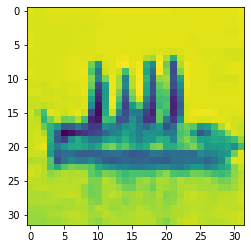

In [95]:
import numpy as np
import matplotlib.pyplot as plt

idx = 12
image = np.array(images[0,0].detach().cpu()) # 연산에서 분리시키고 gpu에서 내려준다.
label = labels[idx].item()
label
pred = predicted[idx].item()
pred

plt.imshow(image*255) # 255로 나눴기 때문에 원래대로 돌림
print('Label : ', label)
print('Predict : ', predicted)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


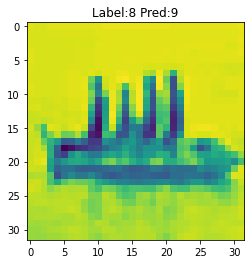

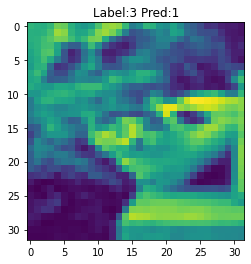

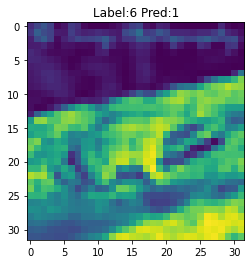

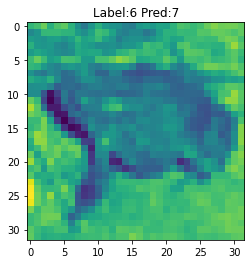

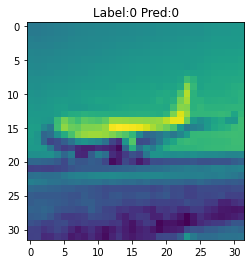

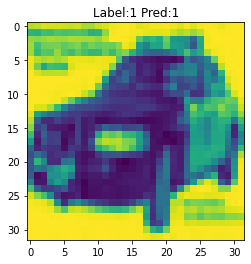

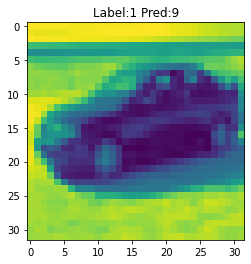

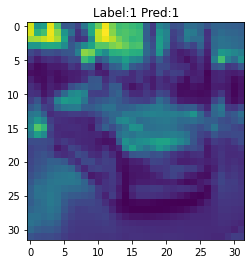

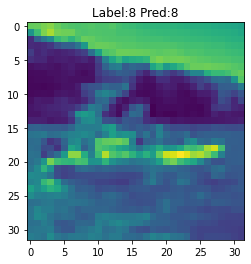

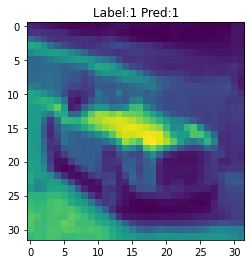

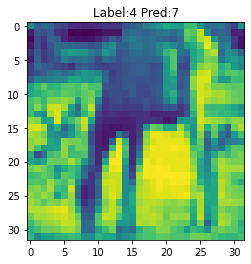

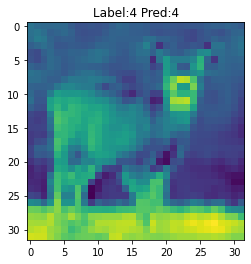

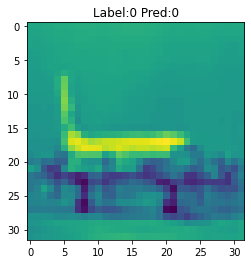

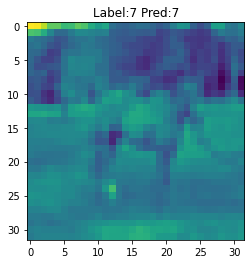

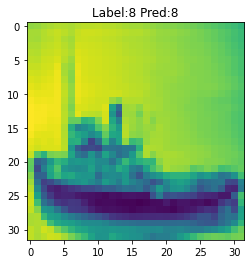

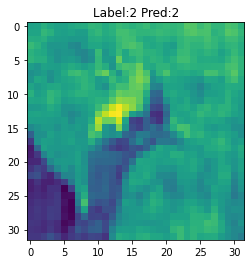

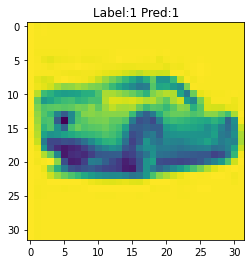

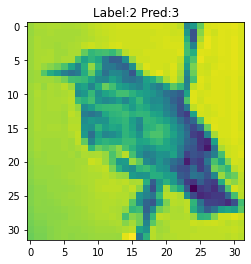

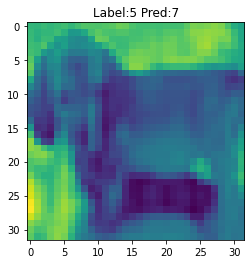

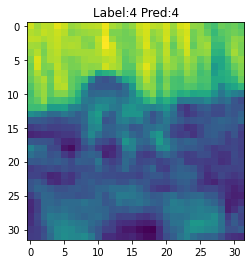

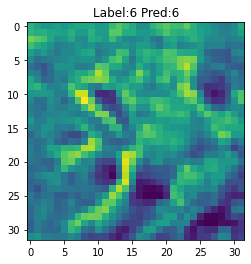

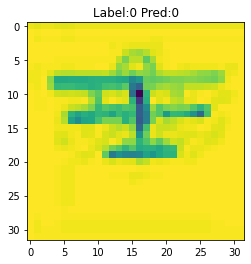

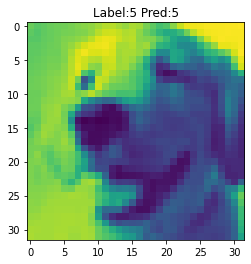

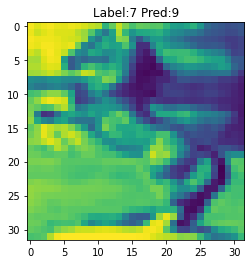

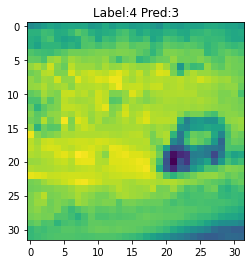

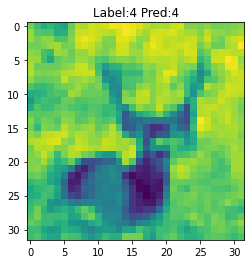

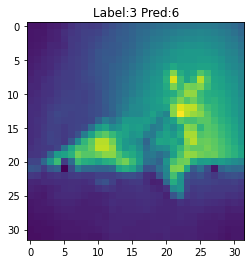

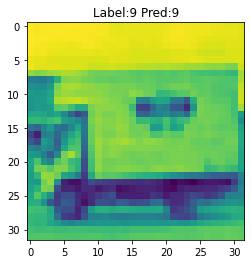

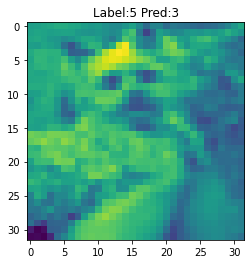

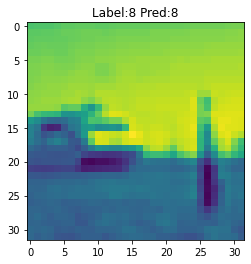

In [96]:
for idx in range(30) : 
  image = np.array(images[idx,0].detach().cpu())
  label = labels[idx].item()
  pred = predicted[idx].item()
  plt.figure()
  plt.title(f'Label:{label} Pred:{pred}')
  plt.imshow(image * 255)